In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [2]:
stud = pd.read_csv('student_scores.csv')
stud.head()
stud.shape

(25, 2)

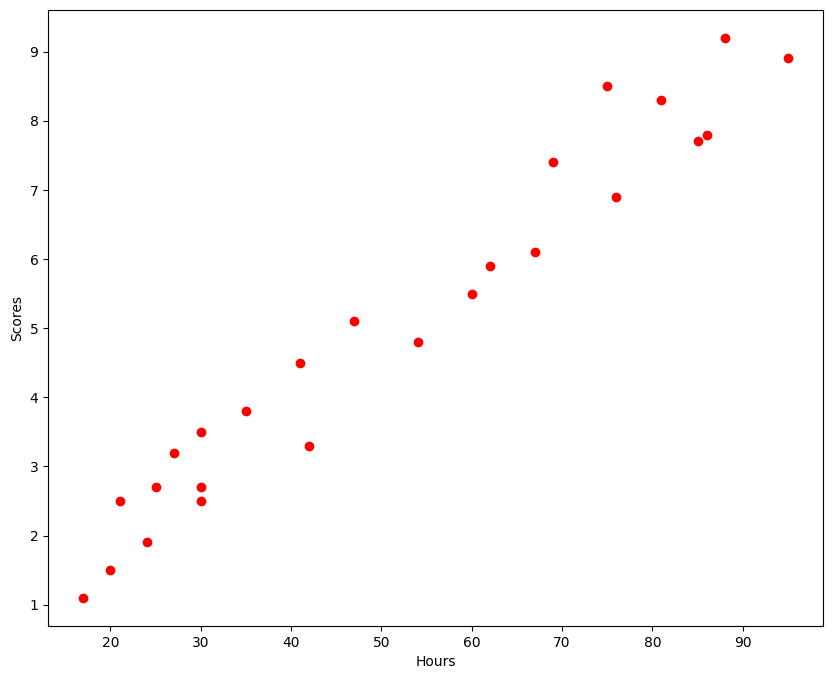

In [3]:
plt.plot(stud['Scores'], stud['Hours'], 'ro')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [4]:
stud.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
X = stud[['Hours']].values
y = stud[['Scores']].values

In [6]:
LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_)

[2.48367341] [[9.77580339]]


In [7]:
X_new = np.random.randint(1,100,(100, 1))
X_new[1:10]

array([[58],
       [ 5],
       [42],
       [79],
       [58],
       [37],
       [67],
       [90],
       [10]])

In [8]:
y_new = LinReg.predict(X_new)
y_new[1:10]

array([[569.48027007],
       [ 51.36269036],
       [413.06741582],
       [774.77214128],
       [569.48027007],
       [364.18839886],
       [657.46250059],
       [882.30597858],
       [100.24170731]])

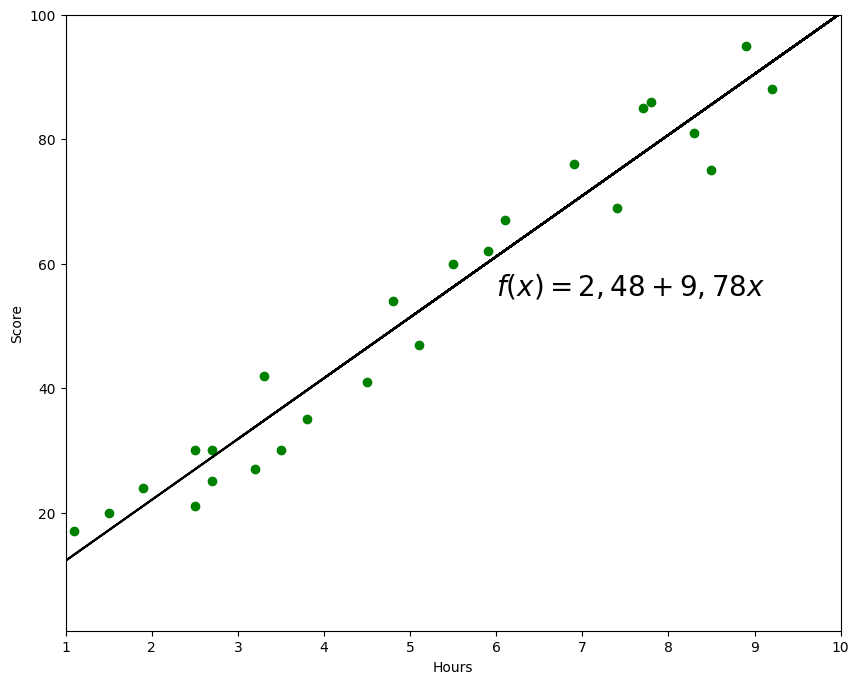

In [9]:
plt.scatter(X, y, color = 'green')
plt.plot(X_new, y_new, color = 'black')
plt.xlim(1, 10)
plt.ylim(1, 100)
plt.text(6, 55, '$f(x)=2,48+9,78x$', fontsize = 20)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [10]:
print(LinReg.score(X, y))

0.9529481969048356


## K-Fold Cross Validation

In [11]:
train_data = stud

In [12]:
kf =KFold(n_splits=5, shuffle=True, random_state=40)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 20, Test set:5
Fold:2, Train set: 20, Test set:5
Fold:3, Train set: 20, Test set:5
Fold:4, Train set: 20, Test set:5
Fold:5, Train set: 20, Test set:5


In [13]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [14]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-44.16521079 -43.29305038 -18.92302628 -45.05864046 -20.61944649]
rmse= 5.87


## Висновок

Показник $score$ при застосуванні $К$-кратної крос-валідації поступово не зменшується, тому для даної вибірки даних покращити модель не можна. До того ж коефіцієнт детермінації $R^2$ самої моделі без використання крос-валідації доволі високий ($R^2=0.95$), тому модель можна прийняти для прогнозування.